# Momentum Trading Strategy

In [1038]:
# Import libraries 
import pandas as pd
import numpy as np 

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

## Yearly data

In [1039]:
year_2000 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2000.csv?token=AJJHLRGDZTN2Q2TNMYCA2NC7EZRB4'
year_2001 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2001.csv?token=AJJHLREVKT5RCPUXAWS7BIK7EZRCA'
year_2002 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2002.csv?token=AJJHLRAUWSQSSDO5FBBHGUC7EWVHI'
year_2003 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2003.csv?token=AJJHLRF3F5VAR5HQPUA7EZC7EWVHE'
year_2004 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2004.csv?token=AJJHLRCVE4X5BE7T373H2Z27EZRE6'
year_2005 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2005.csv?token=AJJHLRDEKBVYMIQDRSBQCPS7EZRFC'
year_2006 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2006.csv?token=AJJHLRGYGVWOPM52BHPX33C7EZRFW'
year_2007 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2007.csv?token=AJJHLRGYWTA3UEGR4EIJVR27EZRF4'
year_2008 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2008.csv?token=AJJHLRCHCGQL5IFG4TRLIHS7EZRGC'
year_2009 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2009.csv?token=AJJHLRH53XU66CDXGTT43TC7EZSWA'
year_2010 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2010.csv?token=AJJHLRFB6D7H4RCNEWWFJFS7EZSV4'
year_2011 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2011.csv?token=AJJHLRGIYO3ENWM6TLQNNMC7EZSWE'
year_2012 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2012.csv?token=AJJHLRB7LQS3CKXA6VANUT27EZSWI'
year_2013 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2013.csv?token=AJJHLRGTNGRVIY6RDYOX4XC7EZTGK'
year_2014 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2014.csv?token=AJJHLRAPYWRW2F7BMEKKV327EZTG2'
year_2015 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2015.csv?token=AJJHLRBVKP65EXGT7GDUHTK7EZTG4'
year_2016 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2016.csv?token=AJJHLRHD6CWY322UTN4PQZC7EZTJQ'
year_2017 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2017.csv?token=AJJHLRCEGFLX6PFYSXNVV2C7EZTJU'
year_2018 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2018.csv?token=AJJHLRCGW7IPM36WLPH5DF27EZTJY'
year_2019 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2019.csv?token=AJJHLRGVP3PGQQKG6V7FOTS7EZTJ6'
year_2020 = 'https://raw.githubusercontent.com/prakharrathi25/trading-strategies/master/year_on_year_data/trading/trading_data2020.csv?token=AJJHLRABOPA6KWSEFOWL4HS7EZTKC'


## Data Preparation

Data preparation function which does the following:- 

1. Date Time fixes
2. Filter companies which are not in the current year 
3. Remove companies which don't have a trading data for a few days

In [1098]:
def prepare_data(prev_data, curr_data):
    '''
        ARGS
            prev_data: Dataset containing last year's data
            curr_data: Dataset containing the current year's data

        RETURN 
            prev_data
            curr_data
    '''
    print("The shape of previous data at the start is:", prev_data.shape)
    print("The shape of current data at the start is:", curr_data.shape)

    # Step 1: Date time fixes

    # Add a datetime column
    prev_data['trade_date'] = pd.to_datetime(prev_data['co_stkdate'], format="%Y%m%d")
    curr_data['trade_date'] = pd.to_datetime(curr_data['co_stkdate'], format="%Y%m%d")

    # Add a month column 

    prev_data['month'] = prev_data['trade_date'].dt.month
    curr_data['month'] = curr_data['trade_date'].dt.month
    
    # Step2: Filter out the companies from previous year data which are not present in the current year 

    # Collect company names
    companies_curr_year = list(curr_data['company_name'].unique())
    print("Total companies in the current year", len(companies_curr_year))

    # Filter out the company names 
    print("Shape before filtering:", prev_data.shape)
    prev_data = prev_data[prev_data['company_name'].isin(companies_curr_year)]
    print("Shape after filtering:", prev_data.shape)

    # Step3: Only keep those companies which have trading data for all the days

    # Remove null values from the prices column 
    prev_data.dropna(subset=['bse_closing_price'], inplace=True)
    curr_data.dropna(subset=['bse_closing_price'], inplace=True)

    # Group the data based on company names 
    grouped_data = prev_data[['company_name', 'co_stkdate']].groupby('company_name', as_index=False).count().sort_values(by='co_stkdate', ascending=False)
    grouped_data.reset_index(drop=True, inplace=True)

    # Collect total trading days
    total_trading_days = grouped_data['co_stkdate'][0]
    print("Total trading days:", total_trading_days)
    
    # Collect companies which have complete trading data 
    grouped_data = grouped_data[grouped_data['co_stkdate'] >= total_trading_days-38]
    complete_data_comp = list(grouped_data['company_name'].unique())

    # Filter the companies
    prev_data = prev_data[prev_data['company_name'].isin(complete_data_comp)]
    curr_data = curr_data[curr_data['company_name'].isin(complete_data_comp)]

    print("The shape of previous data at the end is:", prev_data.shape)
    print("The shape of current data at the end is:", curr_data.shape)

    # Reset indexes for both datasets
    prev_data.reset_index(drop=True, inplace=True)
    curr_data.reset_index(drop=True, inplace=True)

    return prev_data, curr_data

## Calculating Monthly Returns

In [1099]:
def calculate_monthly_return(data):
    '''
    ARGS:
    data : trading data
    m : months
    '''
    companies = list(data['company_name'].unique())
    # creating a temp dataframe grouping by company name and month and extracting the last closing price for that company in the month
    temp=data.groupby(["company_name" , "month"]).agg(price_t1=pd.NamedAgg(column="bse_closing_price", aggfunc="last")).reset_index()

    # Creating variable by shifting the price_t acc to the m given by the user
    temp["price_t"] = temp["price_t1"].shift(1)

    # Calculating returns as mr = (pt+1 - pt)/pt
    temp["monthly_return"] = (temp["price_t1"] - temp["price_t"]) / (temp["price_t"])
    temp = pd.pivot_table(temp[['company_name', 'monthly_return', 'month']], columns='company_name', index='month')
    temp.columns = companies

    # Filtering out the null values

    # df=temp.loc[temp["month"] == m]

    print('No of companies:', temp.shape[1])
    return temp

In [1100]:
def alternate_returns(data): 

    # Calculate previous price 
    data['prev_price'] = data['bse_closing_price'].shift(1)
    data.dropna(subset=['bse_closing_price'], inplace=True)
    data['daily_ret'] = (data['bse_closing_price'] - data['prev_price'])/data['prev_price']

    # Remove first entry 
    first = data.drop_duplicates(subset=['company_name', 'month'], keep='first')
    data = data[~data.index.isin(first.index)]

    companies = list(data['company_name'].unique())
    
    cols = ['month', 'company_name', 'monthly_return']
    entries = [] 

    for comp in companies:
        for i in range(1, 13): 
            entry = [i, comp]
            
            # collect dataa
            mask1 = data['company_name'] == comp
            mask2 = data['month'] == i
            filter_data = data[(mask1) & (mask2)]

            n_days = filter_data.shape[0]
            
            returns = ((np.prod(filter_data['daily_ret']+1))**(1/n_days) - 1) * np.sqrt(n_days)

            entry.append(returns)
                    
            entries.append(entry)

    # Make a dataframe
    rets = pd.DataFrame(entries, columns=cols)

    # Pivot the returns 
    rets = pd.pivot_table(rets, index='month', columns='company_name')
    rets.columns = company_list
    return rets


## Calculating intermediate term momentum

In [1101]:
# Function to get winner and loser portfolios 
def get_winner_loser(monthly_ret, n_months):

    '''
        ARGS
        monthly_ret: Data containing the monthly returns 
        n_months: Number of lookback months, max=11 
    '''

    # Calculate intermediate term momentum using gross monthly returns 
    global momentum
    momentum = ((monthly_ret[10-n_months:10] + 1).prod() - 1) * 100
    momentum = pd.DataFrame(momentum, columns=['momentum'])
    momentum.reset_index(inplace=True)
    momentum.columns = ['company_name', 'momentum']

    total_comp = momentum.shape[0]
    winner_size = loser_size = int(total_comp/10)
    
    #Dividing list of companies in a decile
    print("The winner and loser sizes are: ", winner_size)

    # Get winner portfolios 
    winner = momentum.sort_values(by='momentum', ascending=False)[:winner_size]

    # Get loser portfolios 
    loser = momentum.sort_values(by='momentum', ascending=True)[:loser_size]

    # Return the portfolios
    return winner, loser

In [1102]:
monthly_returns

,A D F FOODS LTD.,A I A ENGINEERING LTD.,DISH T V INDIA LTD.,A V T NATURAL PRODUCTS LTD.,AAREY DRUGS & PHARMACEUTICALS LTD.,AARTI DRUGS LTD.,AARTI INDUSTRIES LTD.,ABAN OFFSHORE LTD.,RADICO KHAITAN LTD.,TRIDENT LTD.,...,BANDHAN BANK LTD.,THINKINK PICTUREZ LTD.,ADANI GREEN ENERGY LTD.,YASH CHEMEX LTD.,LASA SUPERGENERICS LTD.,SINTEX PLASTICS TECHNOLOGY LTD.,P S P PROJECTS LTD.,PRICOL LTD.,SOLARA ACTIVE PHARMA SCIENCES LTD.,ORIENT ELECTRIC LTD.
month,,,,,,,,,,,,,,,,,,,,,
2,0.030120,-0.103955,0.581373,-0.035258,0.000915,-0.037438,0.067573,0.087450,0.048667,-0.012058,...,-0.025933,-0.040970,0.226311,0.087273,0.175862,-0.057654,-0.107880,-0.166164,-0.086781,-0.022689
3,0.122807,0.020807,-0.003569,0.073092,0.168320,0.041487,0.043217,0.188067,-0.087730,0.027181,...,0.180779,0.055441,-0.047690,-0.071906,0.076246,-0.103376,0.152774,0.040078,0.079764,0.041259
4,-0.018229,0.543545,0.044776,0.116339,-0.019025,0.022199,0.014023,0.103285,0.002787,0.086634,...,0.101649,-0.207956,-0.027121,-0.048649,-0.193460,0.011765,0.009281,-0.059674,-0.045144,0.002426
5,-0.071618,0.034814,-0.102857,0.066241,0.034092,0.186726,-0.020331,0.021248,0.124392,0.082829,...,0.008657,-0.129475,-0.173048,0.020833,-0.037838,0.000000,0.069504,-0.023335,-0.034862,0.015635
6,-0.060000,-0.137664,-0.216561,0.020592,-0.073177,-0.068411,0.005652,-0.076904,-0.181088,0.008308,...,-0.103652,-0.022734,-0.053294,-0.155844,-0.160815,-0.265116,0.032793,-0.137529,-0.109352,0.012330
7,-0.310030,-0.146637,-0.154472,-0.150186,-0.001281,-0.074720,-0.044851,-0.071824,-0.050566,-0.035943,...,-0.276998,-0.034533,0.068115,-0.101099,-0.015900,0.000000,-0.183156,-0.236824,-0.189444,0.120904
8,-0.237885,0.157120,-0.080769,-0.018128,-0.026128,0.014286,-0.102608,-0.045257,-0.085056,-0.007000,...,0.116210,-0.074106,0.033200,0.112469,-0.136905,0.642405,0.043138,-0.135901,-0.130226,0.098263
9,0.173410,0.136240,0.080544,0.136899,0.060175,0.084507,0.163404,0.026791,-0.057341,-0.025006,...,-0.070634,-0.035045,-0.289597,-0.109890,-0.081773,0.292871,-0.002499,-0.038934,-0.037825,0.038848
10,-0.029557,-0.030775,-0.133591,-0.041650,-0.025772,0.042749,-0.035611,0.069982,-0.141935,0.064307,...,0.110242,-0.060889,-0.016962,0.083951,-0.442060,-0.195231,-0.178360,0.022388,0.016380,-0.003418


In [1103]:
s = get_winner_loser(monthly_returns, 3)
momentum

The winner and loser sizes are:  110


,company_name,momentum
0,A D F FOODS LTD.,13.294798
1,A I A ENGINEERING LTD.,-4.768392
2,DISH T V INDIA LTD.,-7.740586
3,A V T NATURAL PRODUCTS LTD.,8.061442
4,AAREY DRUGS & PHARMACEUTICALS LTD.,0.184344
...,...,...
1098,SINTEX PLASTICS TECHNOLOGY LTD.,0.770713
1099,P S P PROJECTS LTD.,-15.132924
1100,PRICOL LTD.,-1.997951
1101,SOLARA ACTIVE PHARMA SCIENCES LTD.,-19.858156


## Trading and calculating performance 

In [1104]:
def calculate_final_returns(data, companies, n_months, keep='first'):

    # Select the relevant companies 
    data = data[data['company_name'].isin(companies)]

    # Select a list of first entries 
    first_data = data.drop_duplicates(subset=['company_name', 'month'], keep=keep)

    # Create Masks 
    mask = first_data['month'] == n_months + 1
    final_data = first_data[(mask)]

    # Calculate prices 
    start_data = first_data[first_data['month'] == 1]
  
    final = pd.merge(start_data, final_data, on='company_name')[['company_name', 'bse_closing_price_x', 'bse_closing_price_y']]
    final.columns = ['company_name', 'start_price', 'end_price']
    
    # Calculate returns
    final['return'] = (final['end_price'] - final['start_price'])/final['start_price']

    return final


### Calculating the return matrix

In [1105]:
def create_ret_matrix(lookback=[3, 6, 9], holding=[3, 6, 9], keep='first', short=True):
    # Make a matrix for a combination of 3-9 holding and lookback period 
    entries = []
    for l in lookback:
        entry = [l]
        for h in holding:
            # Get winner and loser portfolios
            winner_portfolio, loser_portfolio = get_winner_loser(monthly_ret=monthly_returns, n_months=l)

            # Winner returns 
            winner = list(winner_portfolio['company_name'])
            win_ret = calculate_final_returns(data=trading_prev, companies=winner, n_months=h, keep=keep)
            profit1 = win_ret['return'].mean()

            # Loser returns 
            loser = list(loser_portfolio['company_name'])
            loss_ret = calculate_final_returns(data=trading_prev, companies=loser, n_months=h, keep=keep)
            profit2 = loss_ret['return'].mean()

            if short==True: final = (profit1 - profit2) * 100
            else: final = (profit1)*100
            
            entry.append(final)
        entries.append(entry)
    
    # Make a dataframe
    labels = ['Lookback'] + holding
    return_matrix = pd.DataFrame(entries, columns=labels).set_index('Lookback')
    return return_matrix

## Run Everything

In [1128]:
# Load the data for previous year and current year 
trading_prev = pd.read_csv('year_on_year_data\\trading\\trading_data2019.csv')
trading_curr = pd.read_csv('year_on_year_data\\trading\\trading_data2020.csv')
print(trading_prev.shape, trading_curr.shape)

(696820, 10) (177906, 10)


In [1129]:
# Create a copy of the dataset to reuse 
trading_prev_og = trading_prev
trading_curr_og = trading_curr

In [1130]:
trading_prev.head()

,co_code,company_name,co_stkdate,bse_closing_price,bse_market_cap,bse_pb,nse_closing_price,nse_market_cap,nse_pb,year
0,11,20 MICRONS LTD.,20190101,44.30,1563.1920,1.0513,44.25,1561.4277,1.0501,2019
1,11,20 MICRONS LTD.,20190102,43.75,1543.7845,1.0383,44.05,1554.3704,1.0454,2019
2,11,20 MICRONS LTD.,20190103,43.40,1531.4342,1.0300,43.45,1533.1985,1.0311,2019
3,11,20 MICRONS LTD.,20190104,42.05,1483.7974,0.9979,42.25,1490.8547,1.0027,2019
4,11,20 MICRONS LTD.,20190107,42.30,1492.6190,1.0038,42.65,1504.9693,1.0122,2019


In [1131]:
twenty_market_cap = trading_prev['bse_market_cap'].quantile(q=0.3)
print(twenty_market_cap)
trading_prev = trading_prev[trading_prev['bse_market_cap'] > twenty_market_cap]
trading_prev.shape

351.84681999999987


(454957, 10)

In [1132]:
# Run the data prep function 
trading_prev, trading_curr = prepare_data(prev_data=trading_prev, curr_data=trading_curr)

# Total Companies left 
company_list = list(trading_prev['company_name'].unique()) 
len(company_list)

The shape of previous data at the start is: (454957, 10)
The shape of current data at the start is: (177906, 10)
Total companies in the current year 4014
Shape before filtering: (454957, 12)


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Shape after filtering: (451989, 12)


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Total trading days: 245
The shape of previous data at the end is: (388117, 12)
The shape of current data at the end is: (101173, 12)


1610

In [1133]:
# temp dataframe can be removed later it is just for checking if the function is working properly
monthly_returns = calculate_monthly_return(trading_prev)
# monthly_returns = alternate_returns(trading_prev)
# Drop the first column of returns 
monthly_returns.drop(1, axis=0, inplace=True)
monthly_returns

No of companies: 1610


,20 MICRONS LTD.,A B M KNOWLEDGEWARE LTD.,A D F FOODS LTD.,A I A ENGINEERING LTD.,A K CAPITAL SERVICES LTD.,A P M INDUSTRIES LTD.,DISH T V INDIA LTD.,A S M TECHNOLOGIES LTD.,A V T NATURAL PRODUCTS LTD.,AAREY DRUGS & PHARMACEUTICALS LTD.,...,YASH CHEMEX LTD.,VALIANT ORGANICS LTD.,SINTEX PLASTICS TECHNOLOGY LTD.,P S P PROJECTS LTD.,PRICOL LTD.,SOLARA ACTIVE PHARMA SCIENCES LTD.,PRAXIS HOME RETAIL LTD.,ORIENT ELECTRIC LTD.,C E S C VENTURES LTD.,SPENCER'S RETAIL LTD.
month,,,,,,,,,,,,,,,,,,,,,
2,-0.021651,0.030120,0.134656,-0.129592,-0.103955,-0.176704,0.581373,-0.035258,-0.061381,0.000915,...,0.087273,0.175862,-0.068393,-0.057654,-0.107880,-0.021431,0.169256,-0.166164,-0.086781,-0.022689
3,0.055325,0.122807,0.053876,0.116295,0.020807,-0.046679,-0.003569,0.073092,0.124432,0.168320,...,-0.071906,0.076246,0.052031,-0.103376,0.152774,-0.115507,0.243565,0.040078,0.079764,0.041259
4,-0.031455,-0.018229,-0.048197,0.213821,0.543545,0.156487,0.044776,0.116339,-0.070275,-0.019025,...,-0.048649,-0.193460,0.016260,0.011765,0.009281,0.014377,0.178277,-0.059674,-0.045144,0.002426
5,0.101488,-0.071618,-0.012007,-0.157986,0.034814,-0.129638,-0.102857,0.066241,0.109470,0.034092,...,0.020833,-0.037838,-0.030667,0.000000,0.069504,-0.059449,-0.035323,-0.023335,-0.034862,0.015635
6,-0.095823,-0.060000,0.027016,-0.121661,-0.137664,-0.108826,-0.216561,0.020592,-0.097886,-0.073177,...,-0.155844,-0.160815,0.005502,-0.265116,0.032793,0.020511,-0.061484,-0.137529,-0.109352,0.012330
7,-0.093750,-0.310030,-0.093255,-0.210108,-0.146637,-0.359595,-0.154472,-0.150186,-0.164063,-0.001281,...,-0.101099,-0.015900,-0.265390,0.000000,-0.183156,-0.117719,-0.180889,-0.236824,-0.189444,0.120904
8,0.002999,-0.237885,-0.039430,-0.199941,0.157120,-0.079965,-0.080769,-0.018128,-0.138110,-0.026128,...,0.112469,-0.136905,0.035382,0.642405,0.043138,-0.000930,-0.024962,-0.135901,-0.130226,0.098263
9,0.194320,0.173410,0.020903,0.435394,0.136240,-0.034384,0.080544,0.136899,0.204819,0.060175,...,-0.109890,-0.081773,0.142086,0.292871,-0.002499,-0.001396,0.031870,-0.038934,-0.037825,0.038848
10,-0.042553,-0.029557,0.089945,-0.119164,-0.030775,-0.180020,-0.133591,-0.041650,-0.088000,-0.025772,...,0.083951,-0.442060,0.007874,-0.195231,-0.178360,-0.060112,-0.034430,0.022388,0.016380,-0.003418


In [1134]:
returns_matrix = create_ret_matrix(lookback=[3, 6, 9], holding=[3, 6, 9], keep='first', short=True) # change the keep argument from first to last 
returns_matrix

The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161
The winner and loser sizes are:  161


,3,6,9
Lookback,,,
3,1.868048,1.214370,2.115405
6,1.640266,-0.642472,0.864218
9,0.551973,-0.988643,0.207569


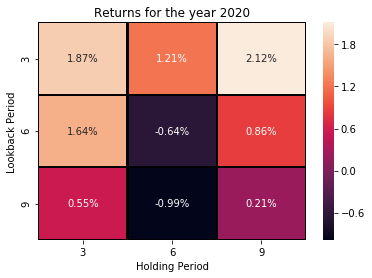

In [1135]:
# Plot the returns matrix
from pylab import savefig

ax = plt.axes()
figure = sns.heatmap(returns_matrix, fmt='.2f', ax = ax, linewidths=1.1 , linecolor='black' ,annot=True)
for t in ax.texts: t.set_text(t.get_text() + "%")

# To extract the year for the heatmap title
year=trading_curr['year'].iloc[0]

# Plot details
ax.set_title('Returns for the year ' + str(year) )# Change title here
ax.set_xlabel('Holding Period')
ax.set_ylabel('Lookback Period')
plt.show()

# Saving the heatmap as image

figure = figure.get_figure()    
figure.savefig('Returns_'+str(year)+'.png')

In [ ]:
three_three = [1.87, ]
l2 = [1.21, ]